<a href="https://colab.research.google.com/github/Srikanth-9492/My_python_notebook/blob/main/Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import required libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
#x = -1 x = +1
#create 100 samples
n_samples = 100
x0 = torch.randn(n_samples,2) * 0.5 + torch.tensor([-1.0,-1.0])
x1 = torch.randn(n_samples,2) * 0.5 + torch.tensor([1.0,1.0])

#define the features and labels
X = torch.cat([x0,x1],dim=0) #features (200,2)
y = torch.cat([torch.zeros(n_samples),torch.ones(n_samples)])     #class1 and class 0

print("shape of data:",X.shape,y.shape)

shape of data: torch.Size([200, 2]) torch.Size([200])


**define the neural network**

input 2 features

Hidden layers 4

output 2 clases  (0 or 1)

In [3]:
class simpleNN(nn.Module):
  def __init__(self):
    super(simpleNN,self).__init__()
    self.fc1 = nn.Linear(2,4)  #input
    self.fc2 = nn.Linear(4,2)  #output(2clases)

  def forward(self,x):
    x = torch.relu(self.fc1(x))
    x = self.fc2(x)
    return x

model = simpleNN()
print(model)

simpleNN(
  (fc1): Linear(in_features=2, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=2, bias=True)
)


Loss function and Optimizer

In [4]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.1)

In [5]:
#training
epochs = 50
losses = []
for epoch in range(epochs):
  #forward pass
  outputs = model(X)
  loss = criterion(outputs,y.long())   #long()  is used to check labels are integers or not

  #backward pass
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  losses.append(loss.item())
  if (epoch+1) %10 ==0:
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [10/50], Loss: 0.5307
Epoch [20/50], Loss: 0.3852
Epoch [30/50], Loss: 0.2857
Epoch [40/50], Loss: 0.2114
Epoch [50/50], Loss: 0.1546


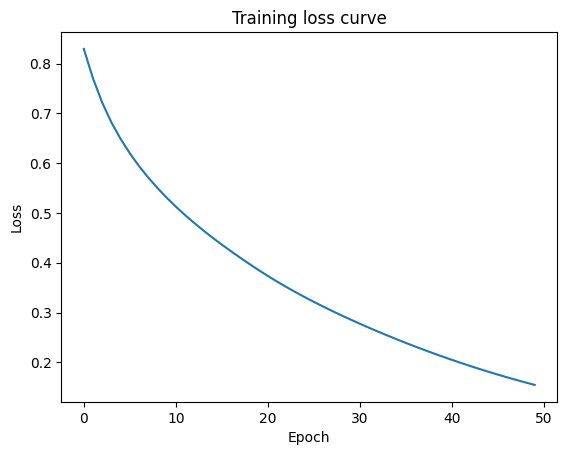

In [6]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training loss curve")
plt.show()